**Alumno: Isaias Eleuterio Tenorio Retis**

**TP3**

**Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template**

<font color="blue">Se importan las siguientes bibliotecas para el desarrollo del proyecto.</font>

In [27]:
import os
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

<font color="blue">Defino una función llamada 'espacio_color_imagen' que determina si todas las imágenes, incluido el template, se encuentran en el mismo espacio de color.</font>

In [28]:
def espacio_color_imagen(ruta_imagen):
    # Cargamos la imagen
    # Imread_unchanged: Nos asegura que se lea la imagen, sin modificar su formato
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_UNCHANGED)
    # Verificamos si la imagen se cargó correctamente
    if imagen is None:
        return None, "Error: La imagen no se pudo cargar , por favor verificar la ruta de la imagen"
    # Verificamos el número de canales
    if len(imagen.shape) == 2:
        return imagen, "La imagen está en escala de grises"
    elif len(imagen.shape) == 3:
        # Si el tercer canal tiene 3 valores
        if imagen.shape[2] == 3:
            return imagen, "La imagen está en el espacio de color RGB."
        # Si el tercer canal tiene 4 valores
        elif imagen.shape[2] == 4:
            return imagen, "La imagen está en el espacio de color RGBA."
        else:
        # Si el número de canales no es 3 ni 4
            return imagen, "La imagen tiene un número de canales no estándar."
    else:
        # Si la imagen no cumple con ninguna de las condiciones anteriores
        return None, "Formato de imagen no soportado."

<font color="blue">Aplicaré la función 'espacio_color_imagen' para comprobar la coherencia del espacio de color entre las imágenes y el template.</font>

In [29]:
# Creamos una lista que contenga las imagenes y el template
imagenes = ['COCA-COLA-LOGO.jpg','coca_logo_1.png','coca_logo_2.png','coca_multi.png','coca_retro_1.png',
          'coca_retro_2.png','logo_1.png','pattern.png']
# Aplicamos la función "espacio_color_imagen"
for imagen in imagenes:
    img, espacio_color = espacio_color_imagen(imagen)
    print(f"Imagen: \033[94m{imagen}\033[0m , Espacio de color: \033[94m{espacio_color}\033[0m")

Imagen: COCA-COLA-LOGO.jpg , Espacio de color: La imagen está en el espacio de color RGB.
Imagen: coca_logo_1.png , Espacio de color: La imagen está en el espacio de color RGBA.
Imagen: coca_logo_2.png , Espacio de color: La imagen está en el espacio de color RGBA.
Imagen: coca_multi.png , Espacio de color: La imagen está en el espacio de color RGBA.
Imagen: coca_retro_1.png , Espacio de color: La imagen está en el espacio de color RGBA.
Imagen: coca_retro_2.png , Espacio de color: La imagen está en el espacio de color RGBA.
Imagen: logo_1.png , Espacio de color: La imagen está en el espacio de color RGBA.
Imagen: pattern.png , Espacio de color: La imagen está en el espacio de color RGBA.


✈ Observación:

<font color ="green">Para garantizar la compatibilidad y mejorar los resultados, convertimos la imagen "COCA-COLA-LOGO.jpg" de RGB a RGBA. Esto asegura que todas las imágenes y el template compartan el mismo espacio de color, lo que nos permite tener un impacto positivo en los resultados.</font>

In [30]:
# Abrimos la imagen
img = Image.open('COCA-COLA-LOGO.jpg')
# De RGB a RGBA
img_rgba = img.convert('RGBA')
# Guardamos la imagen en formato png
img_rgba.save('COCA-COLA-LOGO_rgba.png')

**1) Obtener una detección del logo en cada imagen sin
falsos positivos**

<font color="blue">
Calculamos las dimensiones de las imagenes y del template
</font>

In [31]:
# Lista de imagenes
imagenes = ['COCA-COLA-LOGO_rgba.png', 'coca_logo_1.png', 'coca_logo_2.png', 'coca_multi.png', 'coca_retro_1.png', 'coca_retro_2.png', 'logo_1.png']
# Bucle para iterar sobre la lista de imágenes
for img_path in imagenes:
    # Cargamos la imagen
    img = cv2.imread(img_path)
    # Obtenemos las dimensiones de la imagen
    height, width, channels = img.shape
    # Imprimimos las dimensiones de la imagen
    print(f"Dimensiones de la imagen {img_path}: {width}x{height}")

# Cargamos el template
template = cv2.imread('pattern.png')

# Obtenemos las dimensiones del template
template_height, template_width = template.shape[:2]

# Imprimimos las dimensiones del template
print(f"Dimensiones del template: {template_width}x{template_height}")

Dimensiones de la imagen COCA-COLA-LOGO_rgba.png: 1389x1389
Dimensiones de la imagen coca_logo_1.png: 207x500
Dimensiones de la imagen coca_logo_2.png: 233x363
Dimensiones de la imagen coca_multi.png: 799x598
Dimensiones de la imagen coca_retro_1.png: 715x493
Dimensiones de la imagen coca_retro_2.png: 715x429
Dimensiones de la imagen logo_1.png: 687x450
Dimensiones del template: 400x175


<font color="blue">
Calculamos el promedio de los anchos y altos de las imágenes y utilizamos esos valores como nuevo ancho y alto.
</font>


* Nuevo ancho: (1389 + 207 + 233 + 799 + 715 + 715 + 687) / 7 = 743 píxeles

* Nuevo alto: (1389 + 500 + 363 + 598 + 493 + 429 + 450) / 7 = 555 píxeles

Imagen redimensionada y guardada en: redimensionadas/COCA-COLA-LOGO_rgba.png


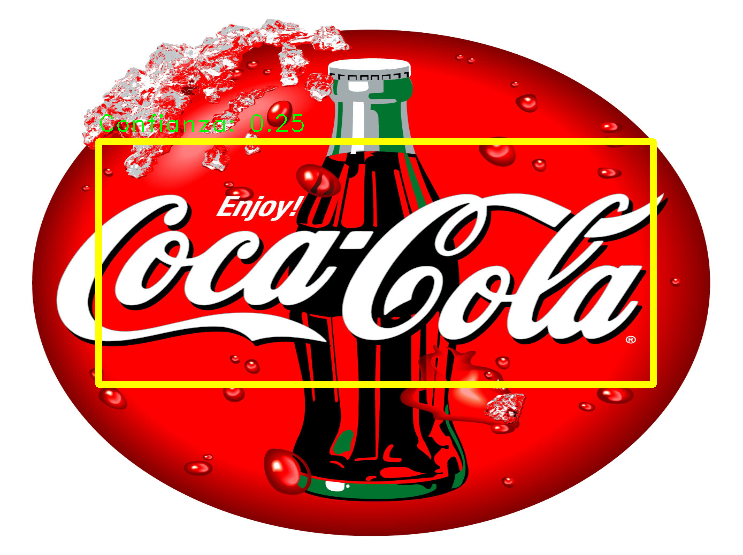

Imagen redimensionada y guardada en: redimensionadas/coca_logo_1.png


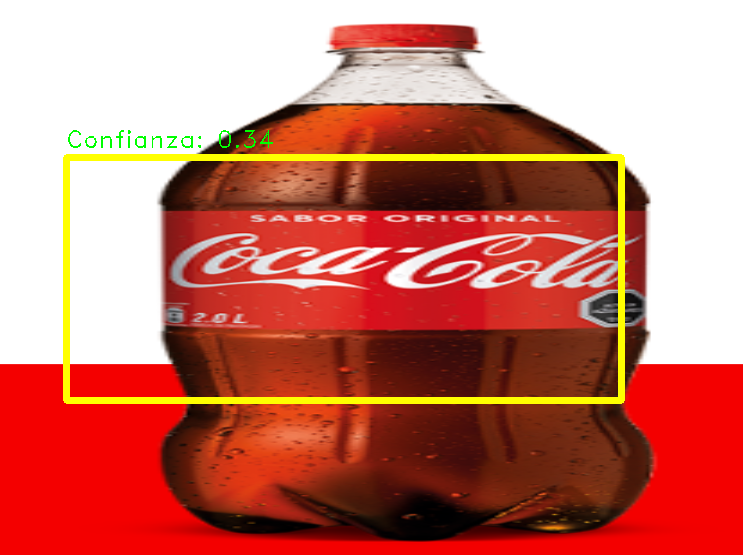

Imagen redimensionada y guardada en: redimensionadas/coca_logo_2.png


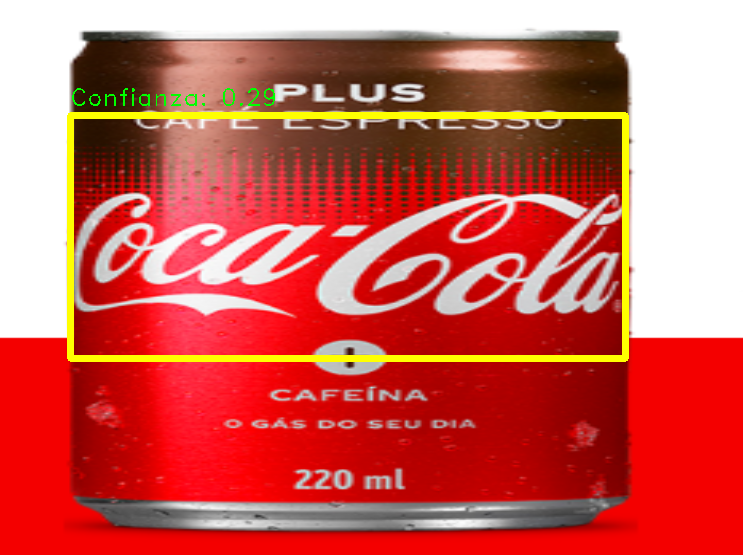

Imagen redimensionada y guardada en: redimensionadas/coca_multi.png


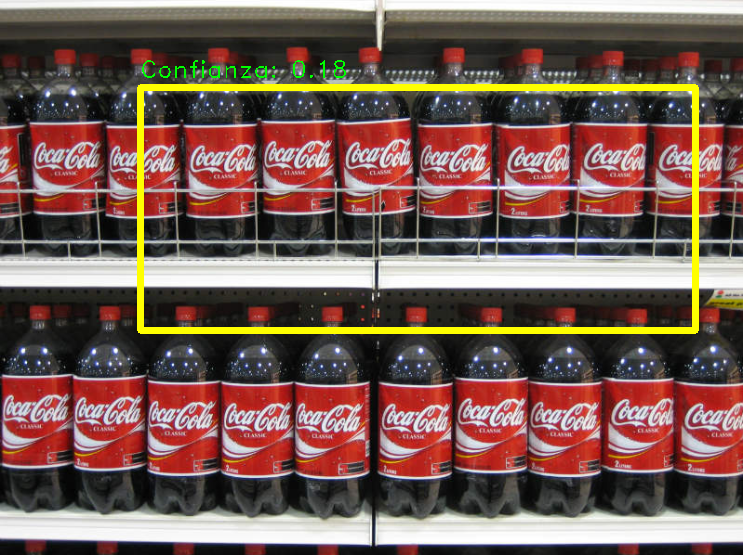

Imagen redimensionada y guardada en: redimensionadas/coca_retro_1.png


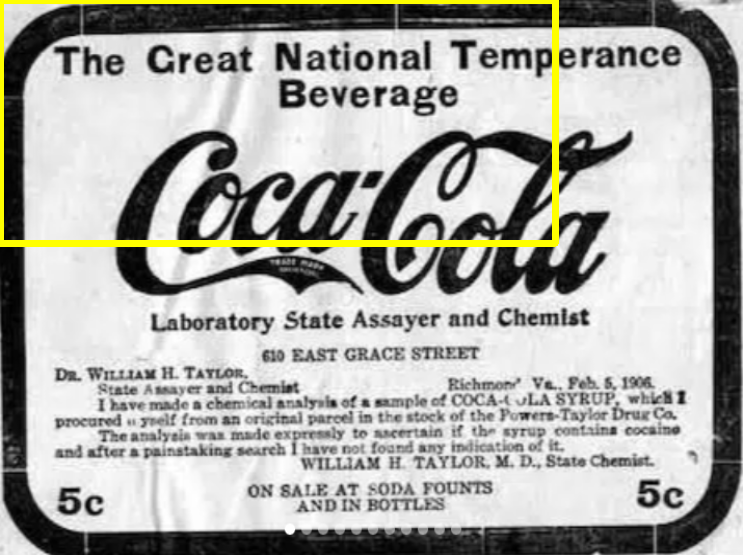

Imagen redimensionada y guardada en: redimensionadas/coca_retro_2.png


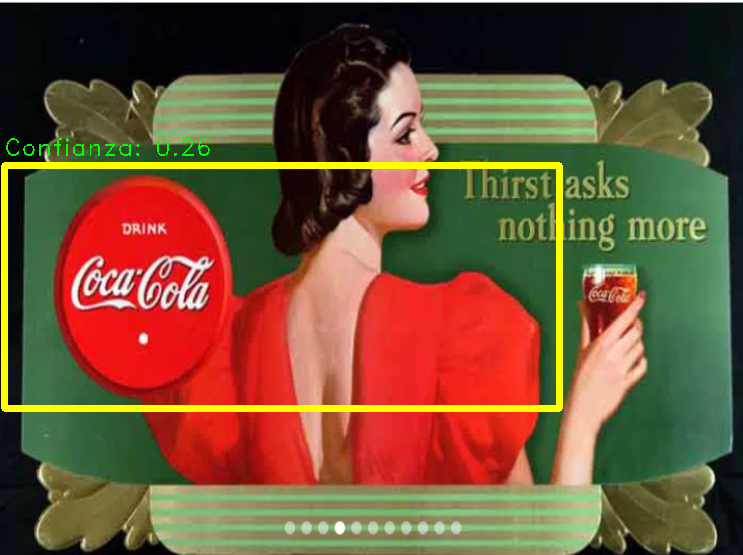

Imagen redimensionada y guardada en: redimensionadas/logo_1.png


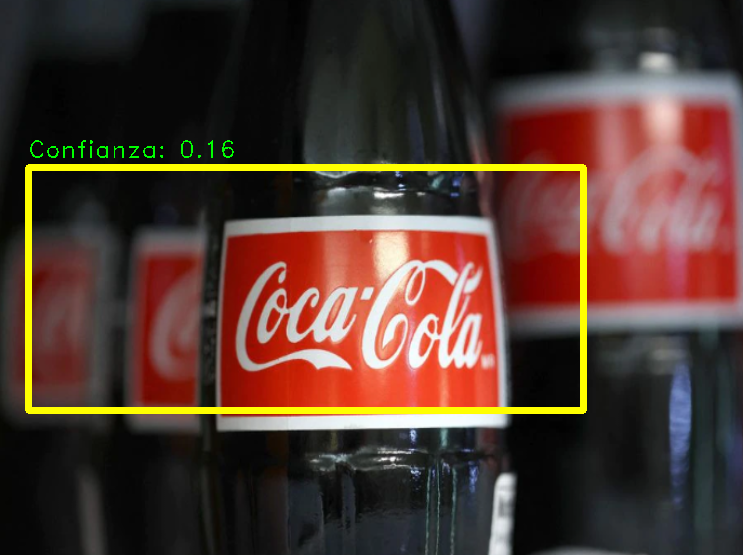

Imagen: COCA-COLA-LOGO_rgba.png, Confianza máxima: 0.25
Imagen: coca_logo_1.png, Confianza máxima: 0.34
Imagen: coca_logo_2.png, Confianza máxima: 0.29
Imagen: coca_multi.png, Confianza máxima: 0.18
Imagen: coca_retro_1.png, Confianza máxima: 0.67
Imagen: coca_retro_2.png, Confianza máxima: 0.26
Imagen: logo_1.png, Confianza máxima: 0.16


In [32]:
# Parámetros
nuevo_ancho =743
nuevo_alto = 555
output_folder = 'redimensionadas/'

# Creamos una carpeta para guardar las imágenes redimensionadas
os.makedirs(output_folder, exist_ok=True)

# Cargamos y preprocesamos el template
template_path = 'pattern.png'
template = cv2.imread(template_path)
template_gris = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template_height, template_width = template_gris.shape

# Lista de imágenes para procesar
imagenes = ['COCA-COLA-LOGO_rgba.png', 'coca_logo_1.png', 'coca_logo_2.png', 'coca_multi.png', 'coca_retro_1.png', 'coca_retro_2.png', 'logo_1.png']

# Redimensionamos imágenes y realizamos coincidencias de template
resultados = []

for img_path in imagenes:
    # Cargamos la imagen
    img = cv2.imread(img_path)

    if img is not None:
        # Redimensionamos la imagen
        resized_img = cv2.resize(img, (nuevo_ancho, nuevo_alto))
        resized_img_gris = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

        # Redimensionamos el template para que sea adecuada para la imagen
        if resized_img_gris.shape[0] >= 100 and resized_img_gris.shape[1] >= 100:
            escala = min(resized_img_gris.shape[1], resized_img_gris.shape[0]) / max(template_height, template_width)
            template_reducido = cv2.resize(template_gris, (0, 0), fx=escala, fy=escala)
            template_height_reducido, template_width_reducido = template_reducido.shape

            if resized_img_gris.shape[0] >= template_height_reducido and resized_img_gris.shape[1] >= template_width_reducido:
                # Aplicamos coincidencia de plantillas
                result = cv2.matchTemplate(resized_img_gris, template_reducido, cv2.TM_CCOEFF_NORMED)
                min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
                resultados.append((max_val, result, resized_img, min_loc, img_path))

                # Redimensionamos el template y mostramos la imagen
                top_left = min_loc
                bottom_right = (top_left[0] + template_width_reducido, top_left[1] + template_height_reducido)
                cv2.rectangle(resized_img, top_left, bottom_right, (0, 255, 255), 5)
                cv2.putText(resized_img, f'Confianza: {max_val:.2f}', (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_DUPLEX, 0.8, (0, 255, 0), 1)

                # Guardamos y mostramos la imagen redimensionada
                output_path = os.path.join(output_folder, os.path.basename(img_path))
                cv2.imwrite(output_path, resized_img)
                print(f"Imagen redimensionada y guardada en: {output_path}")
                cv2_imshow(resized_img)
    else:
        print(f"Error al cargar la imagen: {img_path}")

# Mostramos resultados de coincidencia
if resultados:
    for max_val, result, img, min_loc, img_path in resultados:
        print(f"Imagen: {img_path}, Confianza máxima: {max_val:.2f}")
else:
    print("No se encontró una coincidencia adecuada.")
